In [26]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read a dataset with missing values :
flights = pd.read_csv("http://rcs.bu.edu/examples/python/DataAnalysis/flights.csv")
flights.head(20)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
5,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0
6,2013,1,1,558.0,-2.0,924.0,7.0,UA,N29129,194,JFK,LAX,345.0,2475,5.0,58.0
7,2013,1,1,558.0,-2.0,923.0,-14.0,UA,N53441,1124,EWR,SFO,361.0,2565,5.0,58.0
8,2013,1,1,559.0,-1.0,941.0,31.0,AA,N3DUAA,707,LGA,DFW,257.0,1389,5.0,59.0
9,2013,1,1,559.0,-1.0,854.0,-8.0,UA,N76515,1187,EWR,LAS,337.0,2227,5.0,59.0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [13]:
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [6]:
# Remove observations with missing values :
flights2 = flights.dropna()

In [7]:
flights2[flights2.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute


In [15]:
# Fill missing values with zeros :
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

In [16]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157927 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       157927 non-null  int64  
 1   month      157927 non-null  int64  
 2   day        157927 non-null  int64  
 3   dep_time   157927 non-null  float64
 4   dep_delay  157927 non-null  float64
 5   arr_time   157927 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    157927 non-null  object 
 8   tailnum    157927 non-null  object 
 9   flight     157927 non-null  int64  
 10  origin     157927 non-null  object 
 11  dest       157927 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   157927 non-null  int64  
 14  hour       157927 non-null  float64
 15  minute     157927 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 20.5+ MB


In [17]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


In [18]:
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [19]:
flights2.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,157927.0,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000,157927.000000
mean,2013.0,6.561981,15.739304,1315.957449,9.410101,1517.294408,2.094537,1155.389515,180.685158,1286.803017,12.835671,32.390358
std,0.0,3.407165,8.770307,470.860419,36.448570,510.303574,41.479349,695.043661,97.507866,765.707569,4.725871,18.687713
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,94.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1080.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,6.000000,1944.000000,9.000000,1715.000000,258.000000,1969.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [20]:
# Summary statistic as per group :
flights2.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.569130
AS     5.830748
DL     9.223950
UA    12.016908
US     3.744693
Name: dep_delay, dtype: float64

In [21]:
# Summary statistic as per group :
flights2.groupby('carrier')['arr_delay'].mean()

carrier
AA    0.364291
AS   -9.930889
DL    1.644341
UA    3.558011
US    2.129595
Name: arr_delay, dtype: float64

In [22]:
# Use agg() methods for aggregation :
flights2[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.410101,2.094537
max,1014.000000,1007.000000


In [23]:
# Compute different statistics for different columns :
flights2.agg({'arr_delay':[min,'mean',max], 'carrier':['nunique']})

,arr_delay,carrier
min,-75.000000,NaN
mean,2.094537,NaN
max,1007.000000,NaN
nunique,NaN,5.0


In [24]:
# Convinient describe() function :
flights2.arr_delay.describe()

count    157927.000000
mean          2.094537
std          41.479349
min         -75.000000
25%         -19.000000
50%          -7.000000
75%           9.000000
max        1007.000000
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='arr_delay', ylabel='dep_delay'>

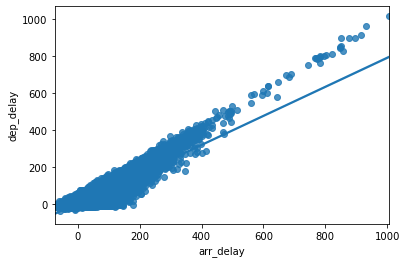

In [27]:
#Using seaborn package explore the dependency of arr_delay on dep_delay (regplot or scatterplot) using flights dataset
sns.regplot(x='arr_delay', y='dep_delay', data=flights2)

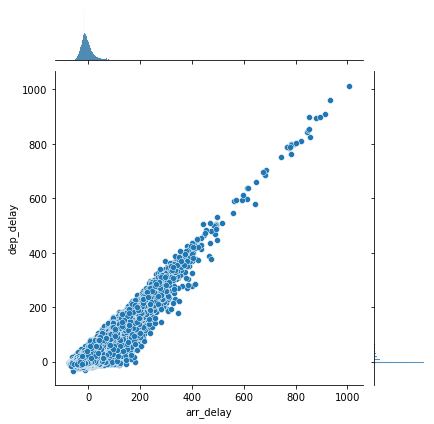

In [28]:
sns.jointplot(x='arr_delay', y='dep_delay', data=flights2)

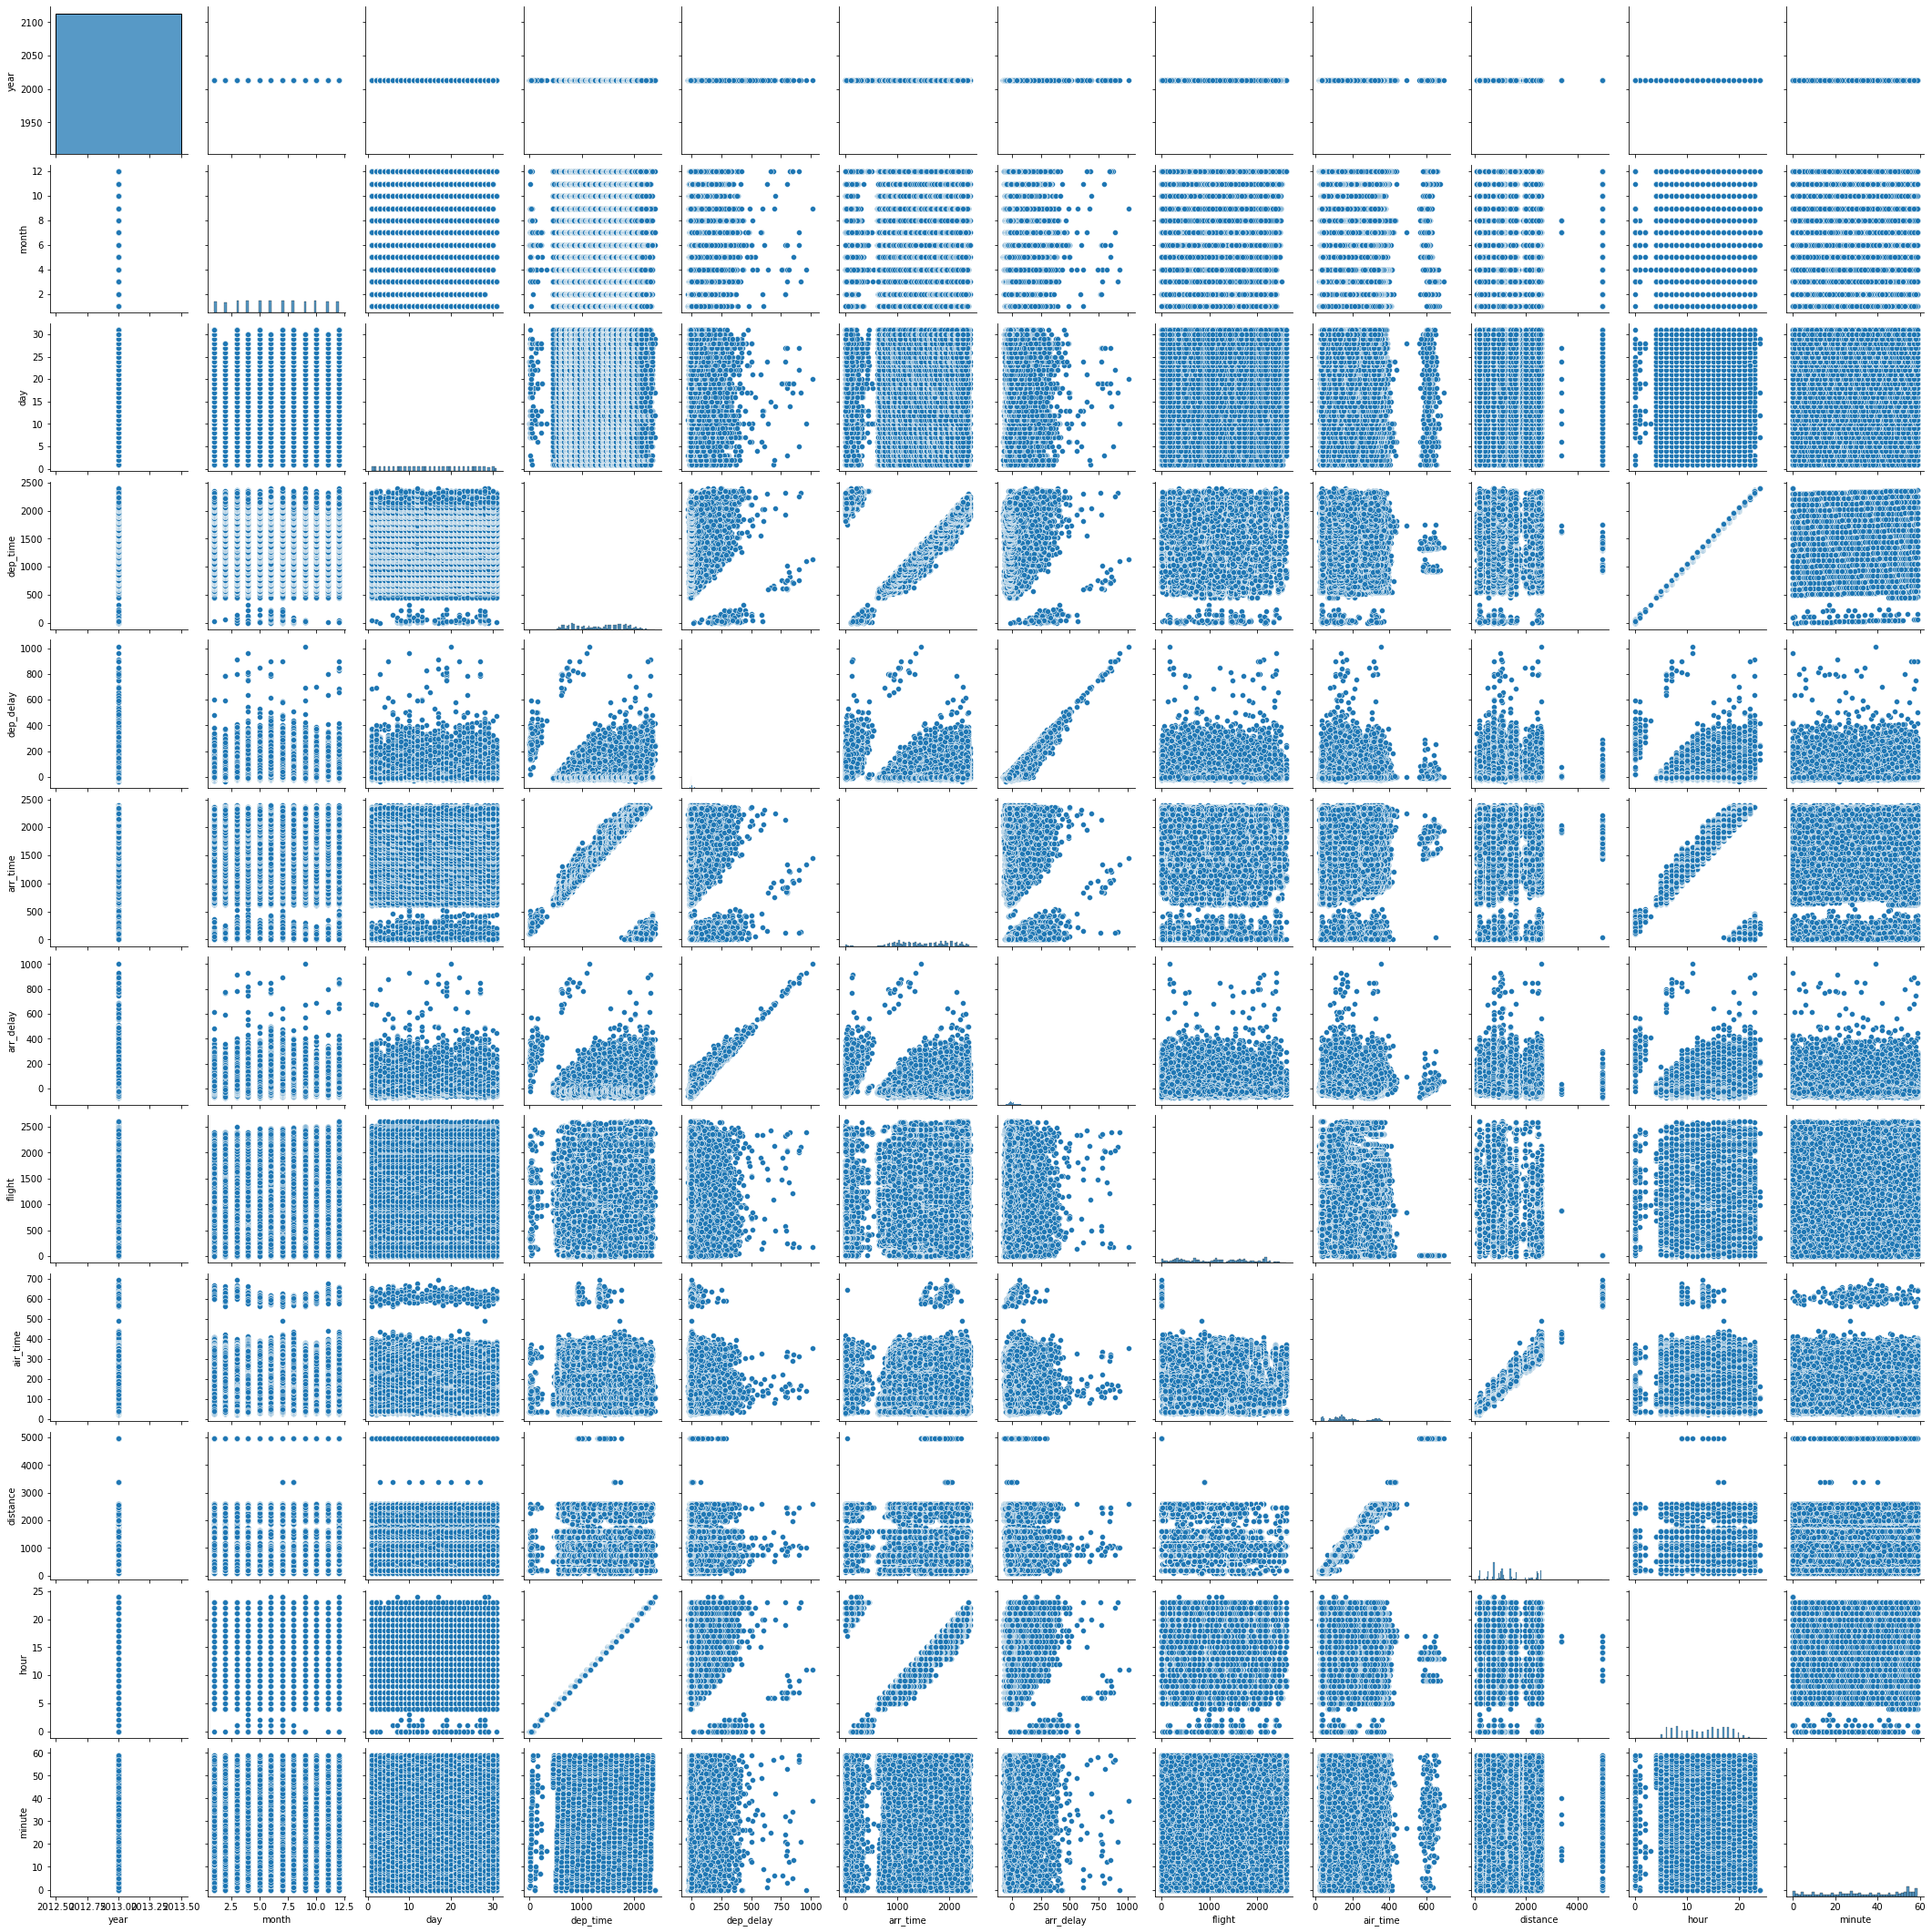

In [29]:
# Pairplot 
sns.pairplot(flights2)